Mean Squared Error: 434464447.06
R² Score: 0.7756


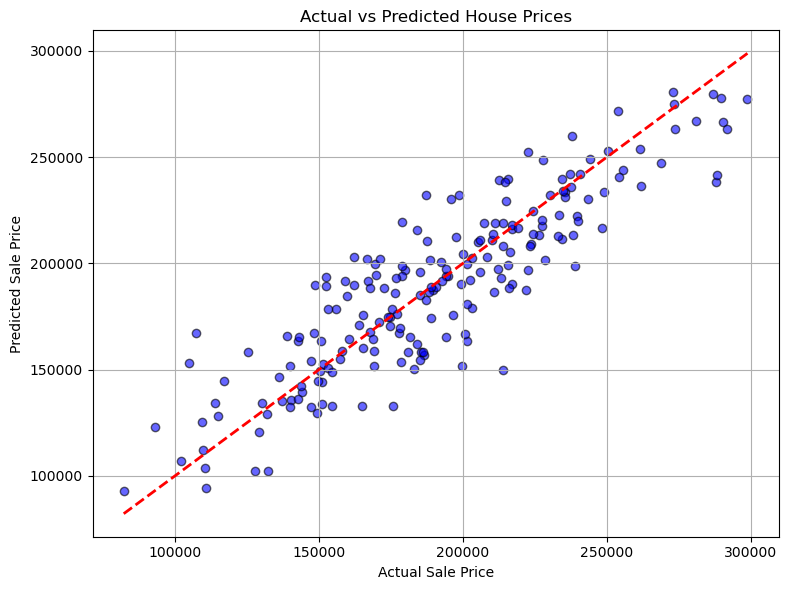

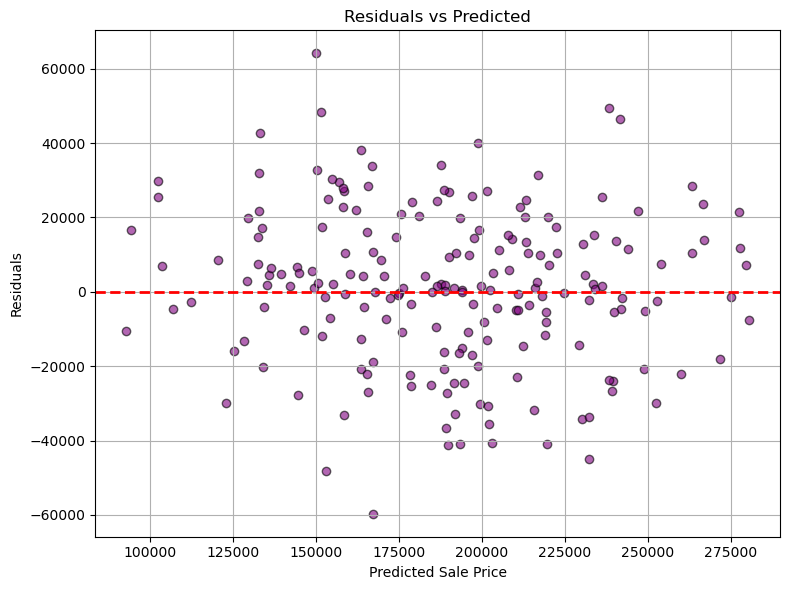

In [11]:
# Task 01 – House Price Prediction using Linear Regression
# Internship Project | Author: Narwade Shreshta
import os
os.makedirs("assets", exist_ok=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 0: Create assets folder if it doesn't exist
os.makedirs("assets", exist_ok=True)

# Step 1: Generate Realistic Dataset
np.random.seed(42)
n = 1000

LotArea = np.random.normal(8500, 2000, n).astype(int)
GrLivArea = np.random.normal(1500, 400, n).astype(int)
OverallQual = np.random.randint(1, 11, n)
GarageArea = np.random.normal(500, 150, n).astype(int)
Bedroom = np.random.randint(2, 6, n)
YearBuilt = np.random.randint(1950, 2023, n)

SalePrice = (
    LotArea * 1.2 +
    GrLivArea * 60 +
    OverallQual * 10000 +
    GarageArea * 30 +
    Bedroom * 3000 +
    (YearBuilt - 1950) * 250 +
    np.random.normal(0, 20000, n)
).astype(int)

df = pd.DataFrame({
    'LotArea': LotArea,
    'GrLivArea': GrLivArea,
    'OverallQual': OverallQual,
    'GarageArea': GarageArea,
    'Bedroom': Bedroom,
    'YearBuilt': YearBuilt,
    'SalePrice': SalePrice
})

# Step 2: Define Features and Target
features = ['LotArea', 'GrLivArea', 'OverallQual', 'GarageArea', 'Bedroom', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]

# Step 3: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.savefig("assets/actual_vs_predicted.png")
plt.show()

# Step 9: Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.savefig("assets/residuals_vs_predicted.png")
plt.show()


In [8]:
plt.savefig("assets/actual_vs_predicted.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
plt.savefig("assets/residuals_vs_predicted.png")
plt.show()

<Figure size 640x480 with 0 Axes>